In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## EDA 

In [18]:
df = pd.read_csv("COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv")
df.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-05,KY,21.00,NELSON,"21,179.00",NaN,NaN,NaN,NaN,nan,0.00,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,NaN,NaN
1,2020-12,OH,39.00,VAN WERT,"39,161.00",0 - 17 years,NaN,NaN,NaN,nan,0.00,Clinical evaluation,Unknown,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
2,2021-05,OH,39.00,WYANDOT,"39,175.00",0 - 17 years,NaN,NaN,NaN,0.00,0.00,Clinical evaluation,Unknown,Probable Case,Symptomatic,No,No,No,NaN
3,2020-12,MI,26.00,HURON,"26,063.00",18 to 49 years,NaN,NaN,NaN,nan,nan,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,NaN,NaN
4,2020-05,WI,55.00,POLK,"55,095.00",18 to 49 years,NaN,NaN,NaN,nan,nan,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,NaN,NaN


In [ ]:
#df.tail()

In [110]:
df_na = df[ df.isna().any(axis=1)]

In [112]:
df_not_null = df[ ~ df.isna().any(axis=1)]

In [114]:
df_na.to_csv('covid-cases-na.csv',index= False)

In [115]:
df_not_null.to_csv('covid-cases-not-null.csv',index= False)

In [19]:
df.shape

(26887803, 19)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26887803 entries, 0 to 26887802
Data columns (total 19 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   case_month                       object 
 1   res_state                        object 
 2   state_fips_code                  float64
 3   res_county                       object 
 4   county_fips_code                 float64
 5   age_group                        object 
 6   sex                              object 
 7   race                             object 
 8   ethnicity                        object 
 9   case_positive_specimen_interval  float64
 10  case_onset_interval              float64
 11  process                          object 
 12  exposure_yn                      object 
 13  current_status                   object 
 14  symptom_status                   object 
 15  hosp_yn                          object 
 16  icu_yn                           object 
 17  death_

In [21]:
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

In [33]:
df.isna().sum()

case_month                        0
res_state                         0
state_fips_code                 650
res_county                        0
county_fips_code            1832227
age_group                         0
sex                               0
race                              0
ethnicity                         0
process                           0
exposure_yn                       0
current_status                    0
symptom_status                    0
hosp_yn                           0
icu_yn                            0
death_yn                    1314646
underlying_conditions_yn          0
dtype: int64

In [23]:
df.isnull().sum()

case_month                                0
res_state                               650
state_fips_code                         650
res_county                          1832227
county_fips_code                    1832227
age_group                            305828
sex                                  801502
race                                4573908
ethnicity                           5483645
case_positive_specimen_interval    19567816
case_onset_interval                14584639
process                                   0
exposure_yn                               0
current_status                            0
symptom_status                            0
hosp_yn                                   0
icu_yn                                    0
death_yn                            1314646
underlying_conditions_yn           25104177
dtype: int64

In [24]:
np.count_nonzero(df.isnull().values)   

75401915

In [25]:
df.nunique()

case_month                           18
res_state                            54
state_fips_code                      54
res_county                         1024
county_fips_code                   1518
age_group                             5
sex                                   5
race                                  8
ethnicity                             4
case_positive_specimen_interval     124
case_onset_interval                 105
process                              12
exposure_yn                           3
current_status                        2
symptom_status                        4
hosp_yn                               4
icu_yn                                4
death_yn                              4
underlying_conditions_yn              2
dtype: int64

In [26]:
# Decided to dropped due to  high percentage missing values 
df = df.drop('case_positive_specimen_interval',axis=1)

In [27]:
# Decided to dropped due to  high percentage missing values 
df = df.drop('case_onset_interval',axis=1)

In [14]:
print('res_state')
print(df['res_state'].unique())
print('age_group')
print(df['age_group'].unique())
print('sex')
print(df['sex'].unique())
print('race')
print(df['race'].unique())
print('ethnicity')
print(df['ethnicity'].unique())
print('process')
print(df['process'].unique())
print('exposure_yn')
print(df['exposure_yn'].unique())
print('hosp_yn')
print(df['hosp_yn'].unique())
print('icu_yn')
print(df['icu_yn'].unique())
print('death_yn')
print(df['death_yn'].unique())
print('underlying_conditions_yn')
print(df['underlying_conditions_yn'].unique())
print('current_status')
print(df['current_status'].unique())
print('symptom_status')
print(df['symptom_status'].unique())

res_state
['KY' 'OH' 'MI' 'WI' 'IL' 'MN' 'NY' 'ME' 'GA' 'IA' 'RI' 'VA' 'MO' 'WA'
 'TN' 'MT' 'PA' 'CO' 'IN' 'AR' 'MS' 'NC' 'SC' 'NE' 'FL' 'CA' 'NJ' 'OK'
 'NM' 'OR' 'UT' 'AL' 'NH' 'MA' 'KS' 'TX' 'ID' 'AZ' 'SD' 'WV' 'DE' 'ND'
 'MD' 'VT' 'LA' 'HI' 'CT' 'AK' 'NV' 'GU' 'VI' 'DC' 'WY' nan 'PR']
age_group
[nan '0 - 17 years' '18 to 49 years' '50 to 64 years' '65+ years'
 'Missing']
sex
[nan 'Missing' 'Female' 'Male' 'Unknown' 'Other']
race
[nan 'Missing' 'Unknown' 'American Indian/Alaska Native' 'Black'
 'Multiple/Other' 'White' 'Asian' 'Native Hawaiian/Other Pacific Islander']
ethnicity
[nan 'Missing' 'Hispanic/Latino' 'Non-Hispanic/Latino' 'Unknown']
process
['Missing' 'Clinical evaluation' 'Other' 'Multiple' 'Unknown'
 'Laboratory reported' 'Routine surveillance'
 'Contact tracing of case patient' 'Other detection method (specify)'
 'Provider reported' 'Routine physical examination' 'Autopsy']
exposure_yn
['Missing' 'Unknown' 'Yes']
hosp_yn
['Yes' 'No' 'Unknown' 'Missing']
icu_yn
['Missing'

In [31]:
for col in ('res_county','res_state','age_group','sex','race','ethnicity','underlying_conditions_yn'):
    print(col)
    df[col].fillna(value='Missing', inplace=True)

res_county
res_state
age_group
sex
race
ethnicity
underlying_conditions_yn


In [32]:
print('res_state')
print(df['res_state'].unique())
print('age_group')
print(df['age_group'].unique())
print('sex')
print(df['sex'].unique())
print('race')
print(df['race'].unique())
print('ethnicity')
print(df['ethnicity'].unique())
print('process')
print(df['process'].unique())
print('exposure_yn')
print(df['exposure_yn'].unique())
print('hosp_yn')
print(df['hosp_yn'].unique())
print('icu_yn')
print(df['icu_yn'].unique())
print('death_yn')
print(df['death_yn'].unique())
print('underlying_conditions_yn')
print(df['underlying_conditions_yn'].unique())
print('current_status')
print(df['current_status'].unique())
print('symptom_status')
print(df['symptom_status'].unique())

res_state
['KY' 'OH' 'MI' 'WI' 'IL' 'MN' 'NY' 'ME' 'GA' 'IA' 'RI' 'VA' 'MO' 'WA'
 'TN' 'MT' 'PA' 'CO' 'IN' 'AR' 'MS' 'NC' 'SC' 'NE' 'FL' 'CA' 'NJ' 'OK'
 'NM' 'OR' 'UT' 'AL' 'NH' 'MA' 'KS' 'TX' 'ID' 'AZ' 'SD' 'WV' 'DE' 'ND'
 'MD' 'VT' 'LA' 'HI' 'CT' 'AK' 'NV' 'GU' 'VI' 'DC' 'WY' 'Missing' 'PR']
age_group
['Missing' '0 - 17 years' '18 to 49 years' '50 to 64 years' '65+ years']
sex
['Missing' 'Female' 'Male' 'Unknown' 'Other']
race
['Missing' 'Unknown' 'American Indian/Alaska Native' 'Black'
 'Multiple/Other' 'White' 'Asian' 'Native Hawaiian/Other Pacific Islander']
ethnicity
['Missing' 'Hispanic/Latino' 'Non-Hispanic/Latino' 'Unknown']
process
['Missing' 'Clinical evaluation' 'Other' 'Multiple' 'Unknown'
 'Laboratory reported' 'Routine surveillance'
 'Contact tracing of case patient' 'Other detection method (specify)'
 'Provider reported' 'Routine physical examination' 'Autopsy']
exposure_yn
['Missing' 'Unknown' 'Yes']
hosp_yn
['Yes' 'No' 'Unknown' 'Missing']
icu_yn
['Missing' 'No' 'Unkn

In [34]:
df.isnull().any(axis=1).sum() # __ records has null

3081717

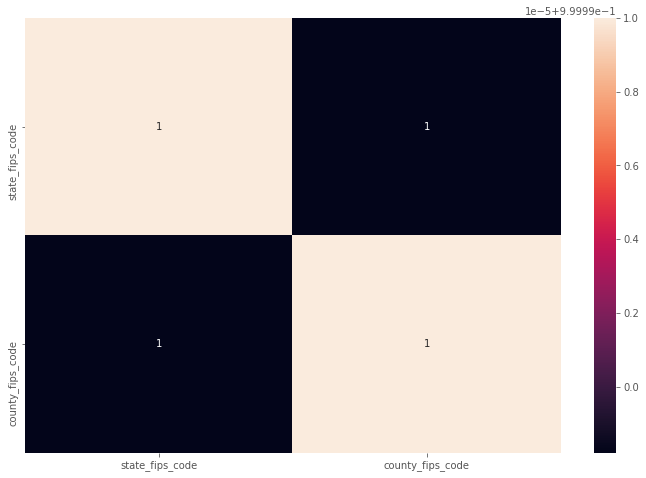

In [36]:
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)
plt.show()

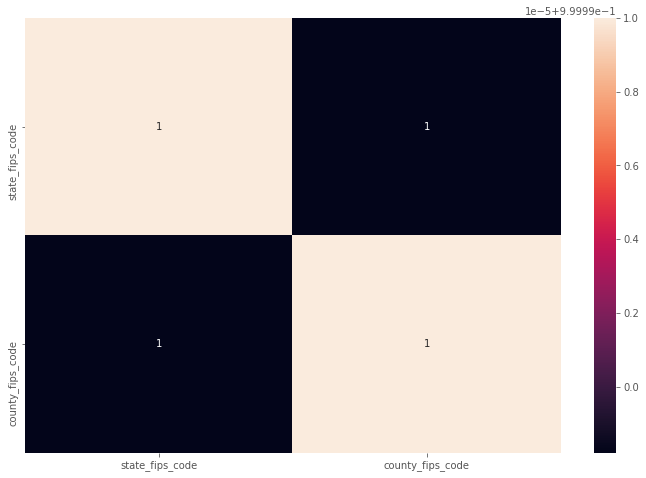

In [35]:
#Correlation with target variable 
corr = df.drop('death_yn',axis=1).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)
plt.show()

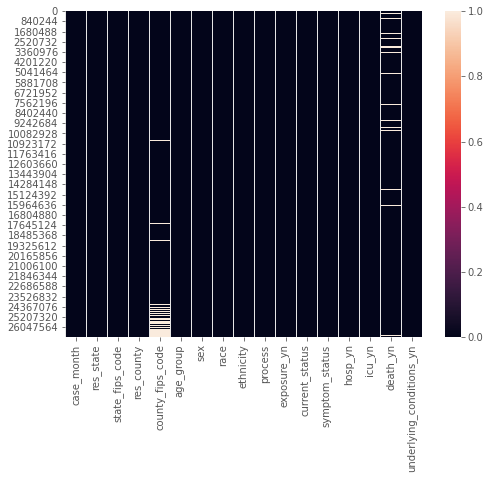

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isna())
plt.show()

`Total cases each month `

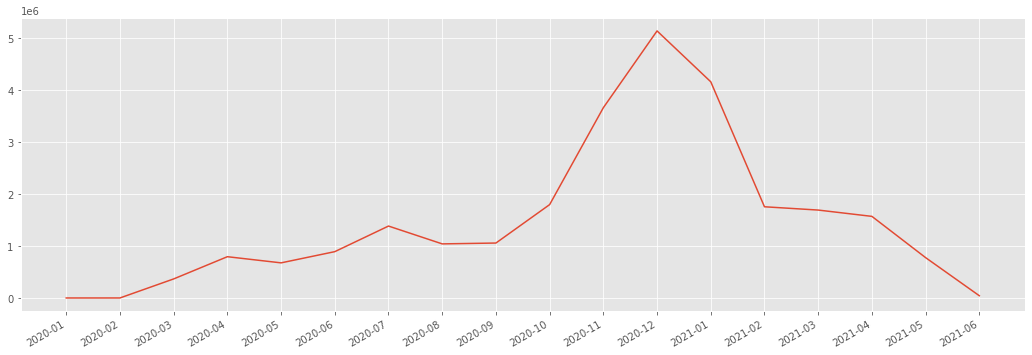

In [40]:
# Total cases each month in millions
dfs = df.groupby("case_month")["case_month"].count()
fig = plt.figure(figsize=(18,6))
plt.plot(dfs.index, dfs.values)
fig.autofmt_xdate()
plt.show()

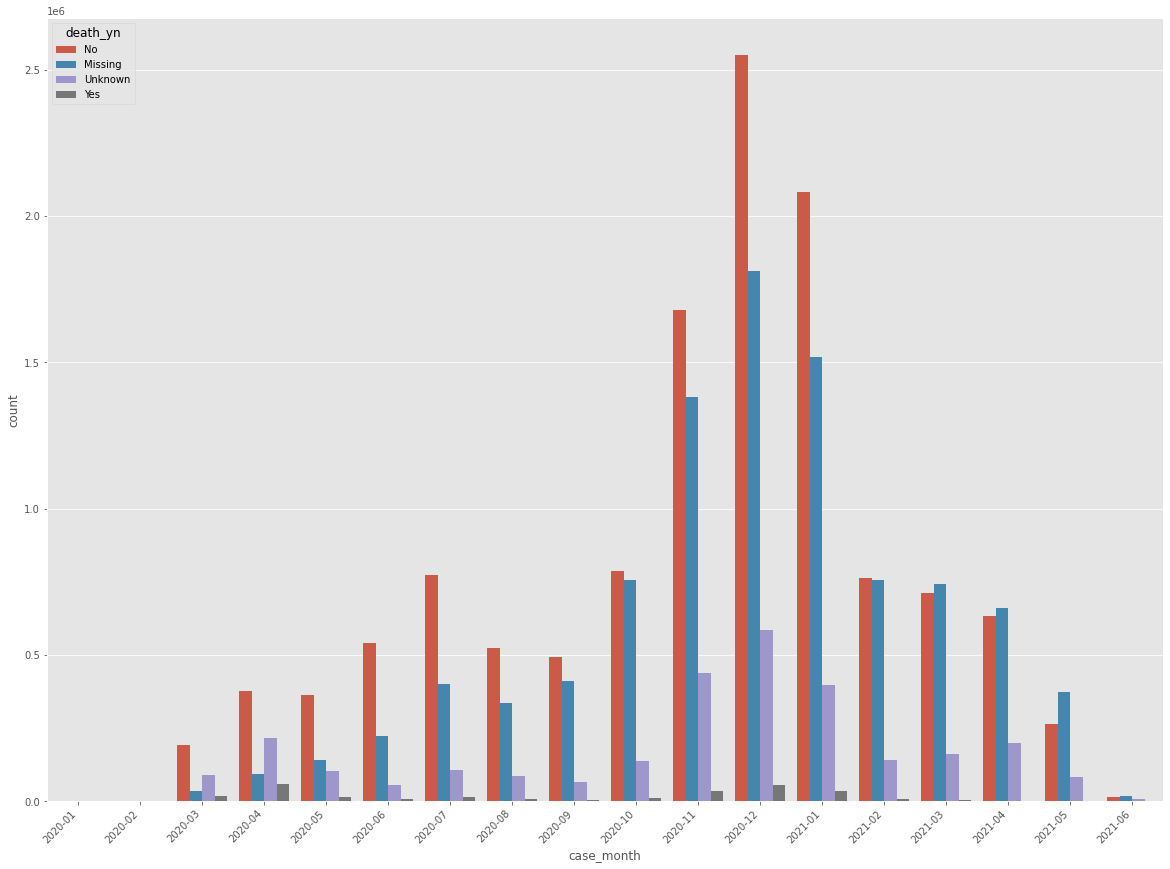

In [72]:
# Total cases each month in millions
dts = list(np.sort(df['case_month'].unique()))
fig = plt.figure(figsize=(20,16));
sns.countplot(df['case_month'], order = dts, hue = df['death_yn']);
fig.autofmt_xdate()
plt.xticks(rotation=45);
plt.show()

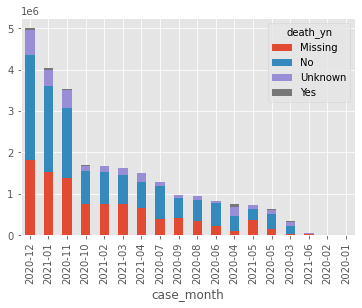

In [77]:
# Total cases each month in millions stacked

dfs = df.groupby(['case_month','death_yn']).count()['res_state'].unstack()
cols=dfs.columns
dfs['total']=dfs.sum(axis=1)
dfs.sort_values(by='total',ascending=False,inplace=True)
dfs[cols].plot(kind='bar',stacked=True);


`Total cases by state in millions `

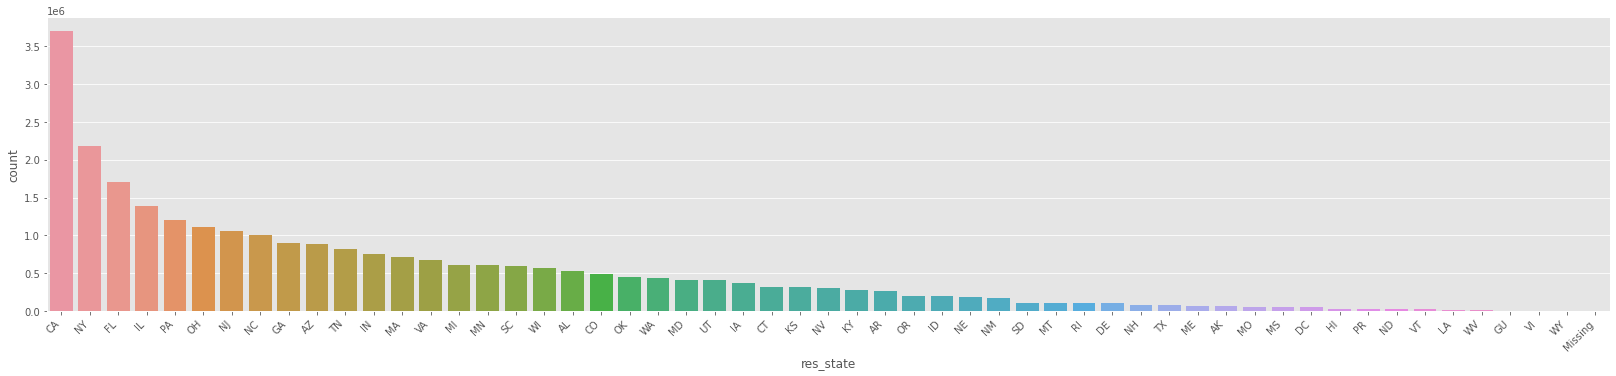

In [107]:
# Total cases each month in millions stacked

fig = plt.figure(figsize=(28,6));
sns.countplot(x='res_state', data=df, order = df['res_state'].value_counts().index);
fig.autofmt_xdate()
plt.xticks(rotation=45);
plt.show()

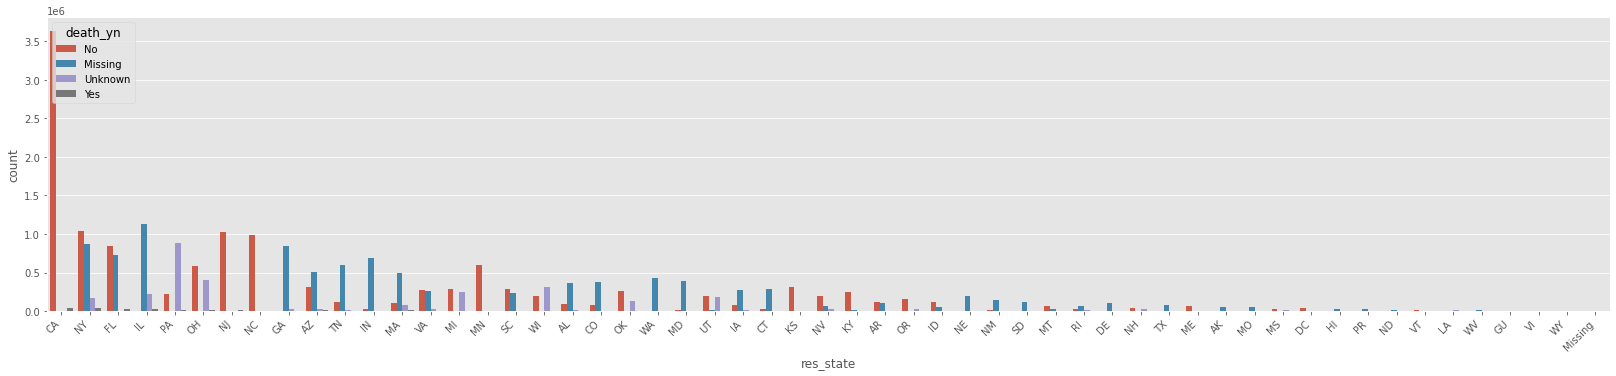

In [93]:
# Total cases each month in millions stacked

fig = plt.figure(figsize=(28,6));
sns.countplot(x='res_state', data=df, order = df['res_state'].value_counts().index,  hue = df['death_yn']);
fig.autofmt_xdate()
plt.xticks(rotation=45);
plt.show()

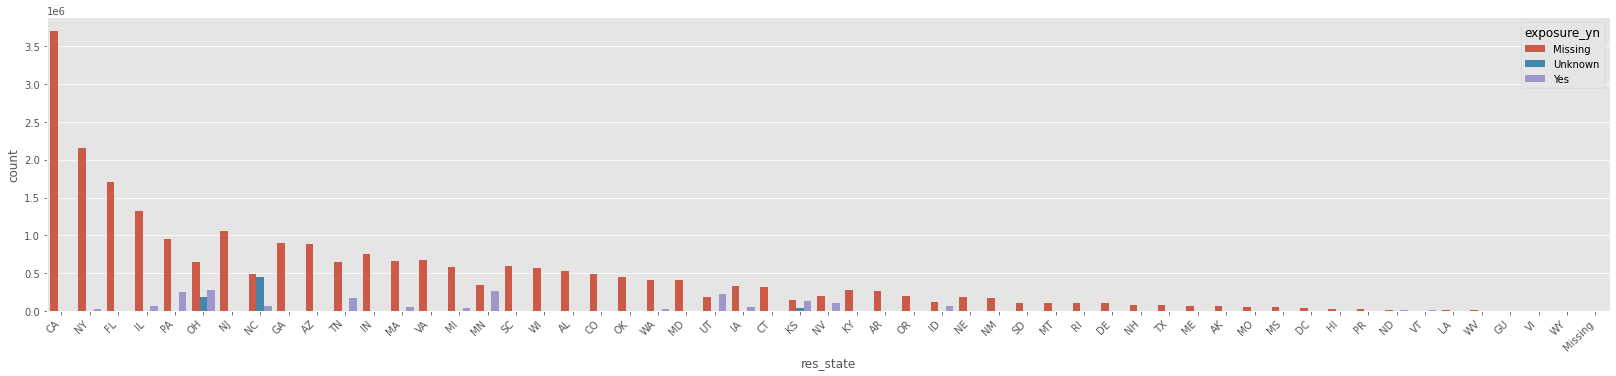

In [109]:
# Total cases each month in millions stacked

fig = plt.figure(figsize=(28,6));
sns.countplot(x='res_state', data=df, order = df['res_state'].value_counts().index,  hue = df['exposure_yn']);
fig.autofmt_xdate()
plt.xticks(rotation=45);
plt.show()

In [120]:
grouped_multiple = df.groupby(['age_group', 'sex','ethnicity','exposure_yn']).agg({'death_yn': ['count']})
#grouped_multiple.columns = [''age_group', 'sex','ethnicity','exposure_yn']
#grouped_multiple = grouped_multiple.reset_index()
grouped_multiple.columns
#print(grouped_multiple)

MultiIndex([('death_yn', 'count')],
           )

In [121]:
# sns.catplot(x="ethnicity", y="death_yn",
#                 hue="age_group", col="ethnicity",
#                 data=df, kind="bar",
#                 height=4, aspect=.7);

`Univariate plots`

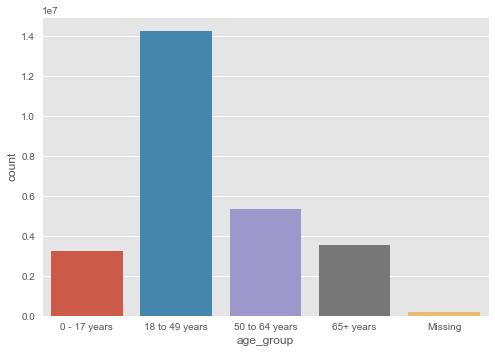

In [45]:
sns.countplot(df['age_group'])
plt.show()

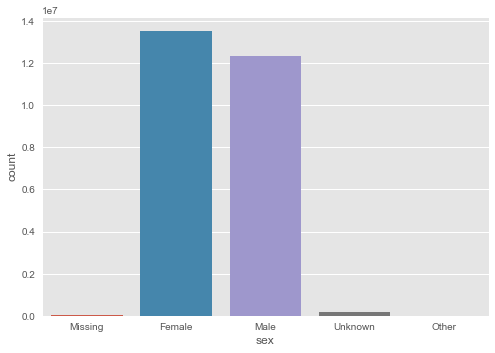

In [46]:
sns.countplot(df['sex'])
plt.show()

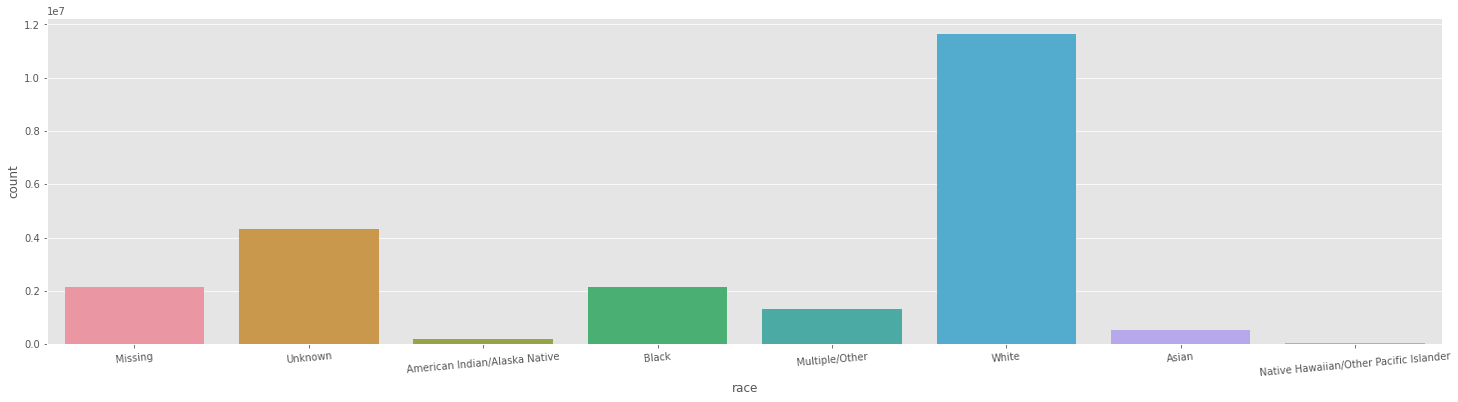

In [5]:
fig = plt.figure(figsize=(25,6))
sns.countplot(df['race'])
plt.xticks(rotation=5)
plt.show()

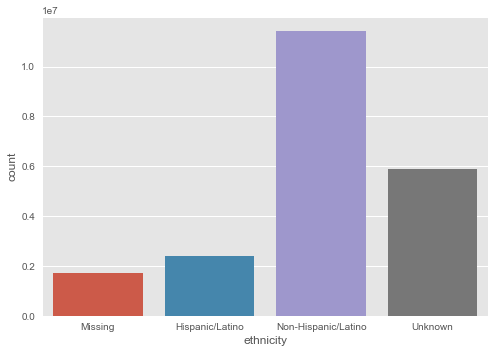

In [48]:
sns.countplot(df['ethnicity'])
plt.show()

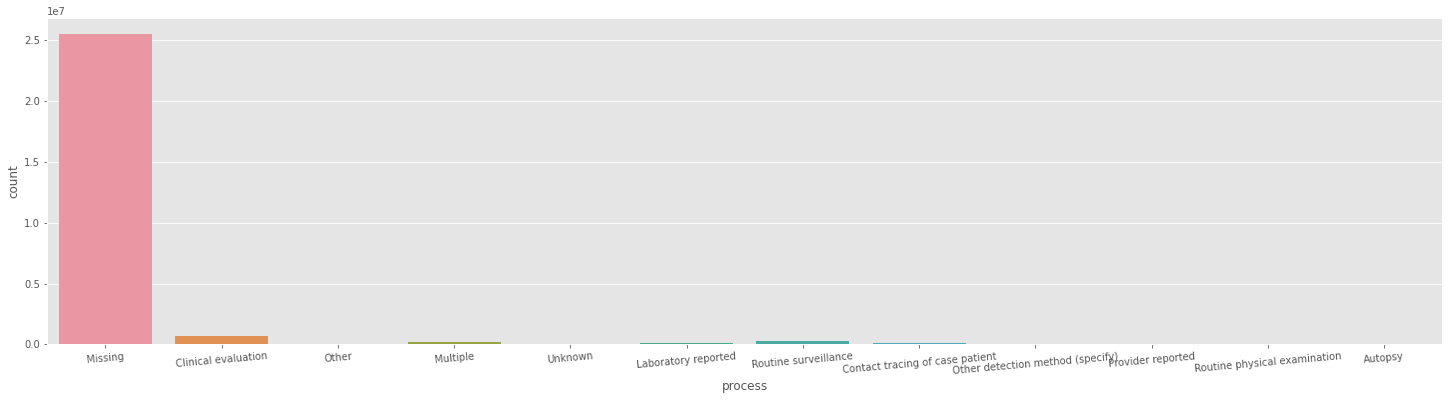

In [6]:
# sns.countplot(df['process'])
# plt.show()
fig = plt.figure(figsize=(25,6))
sns.countplot(df['process'])
plt.xticks(rotation=5)
plt.show()

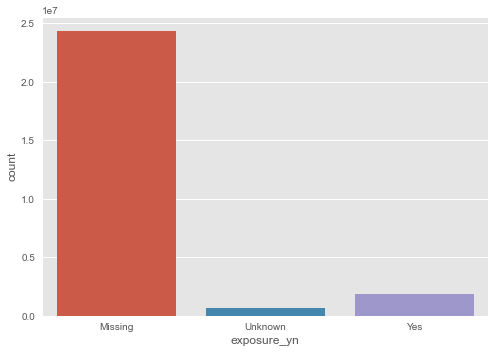

In [50]:
sns.countplot(df['exposure_yn'])
plt.show()

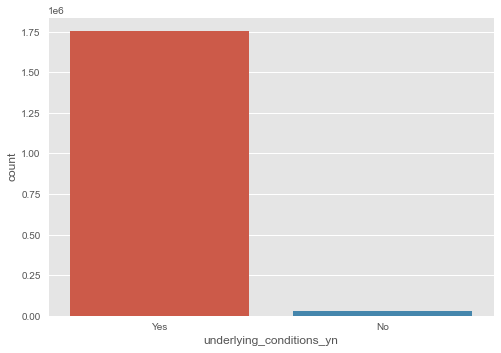

In [51]:
sns.countplot(df['underlying_conditions_yn'])
plt.show()

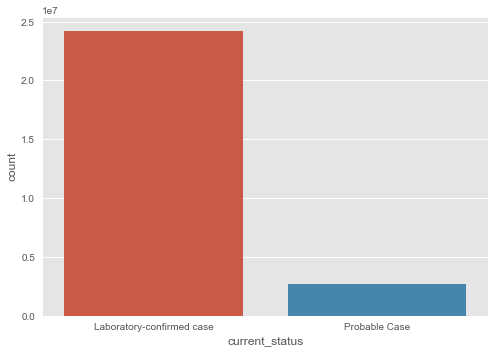

In [52]:
sns.countplot(df['current_status'])
plt.show()

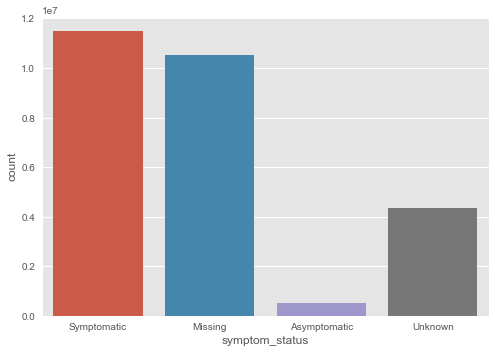

In [53]:
sns.countplot(df['symptom_status'])
plt.show()

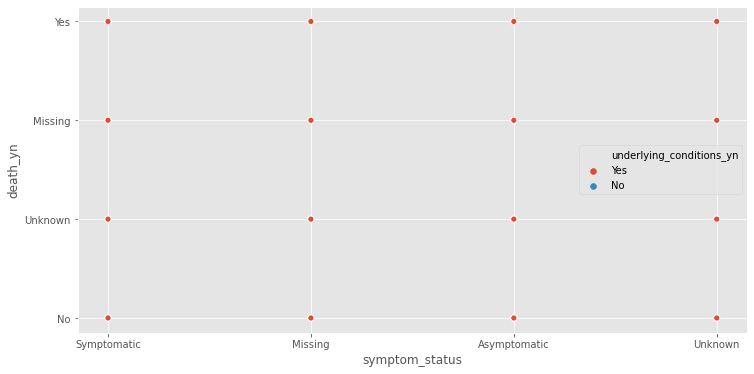

In [6]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="symptom_status", y="death_yn", hue="underlying_conditions_yn", data=df) # Scatterplot between symptom_status and death_yn with colour varying as underlying_conditions_yn type.
plt.show()

In [95]:
df3 = df.groupby('res_state')['exposure_yn'].count().sort_values(ascending=False).head(10) 
df3= df3.reset_index() # flatten the dataframe 
#df3.columns = ['res_state' ,'death_yn']
df3.head()
# %matplotlib inline 
# import seaborn as sns
#sns.barplot(data= df3 , x= 'res_state' , y ='death_yn');

,res_state,exposure_yn
0,CA,3694093
1,NY,2174580
2,FL,1709355
3,IL,1389929
4,PA,1205350


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

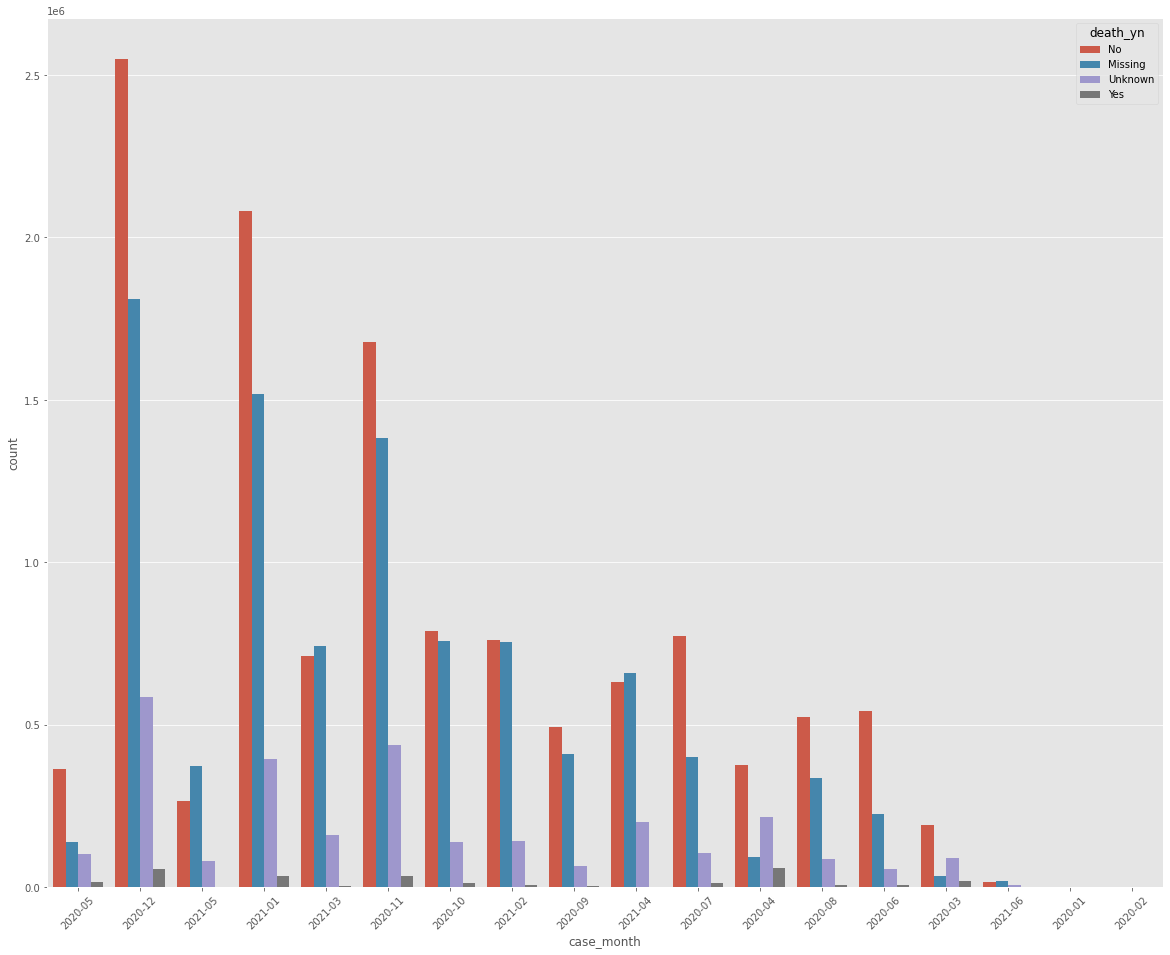

In [83]:
fig = plt.figure(figsize=(20,16))
sns.countplot(df['case_month'], hue = df['death_yn']);
plt.xticks(rotation=45)

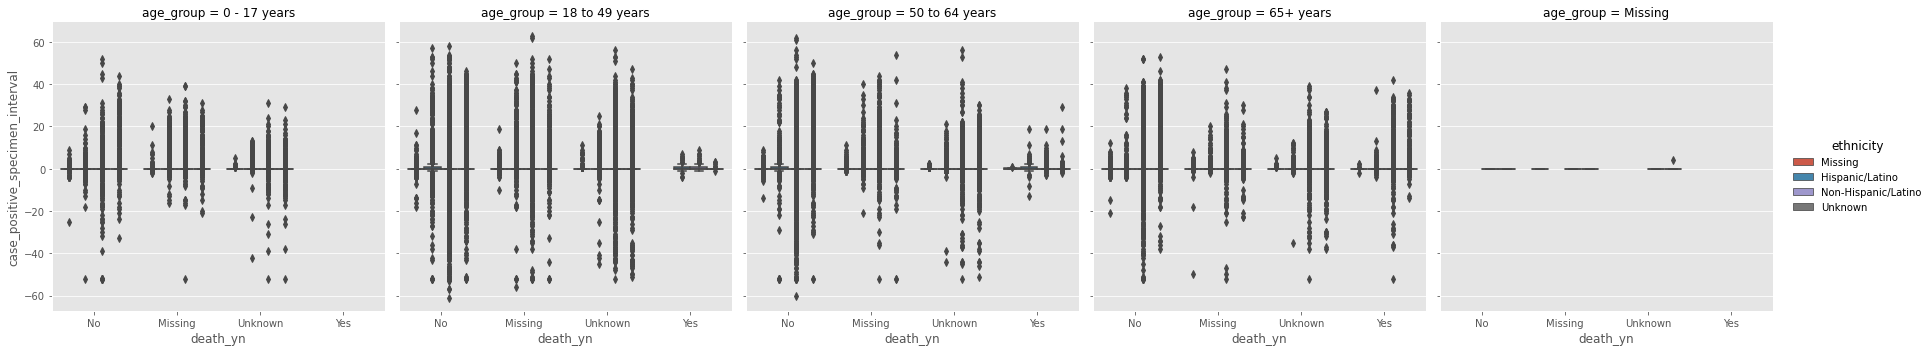

In [8]:
# Decided to dropped due to  high percentage missing values 
# sns.catplot(x="death_yn",
#                y = "case_positive_specimen_interval",
#                hue="ethnicity", 
#                col="age_group", 
#                data=df, 
#                kind="box");

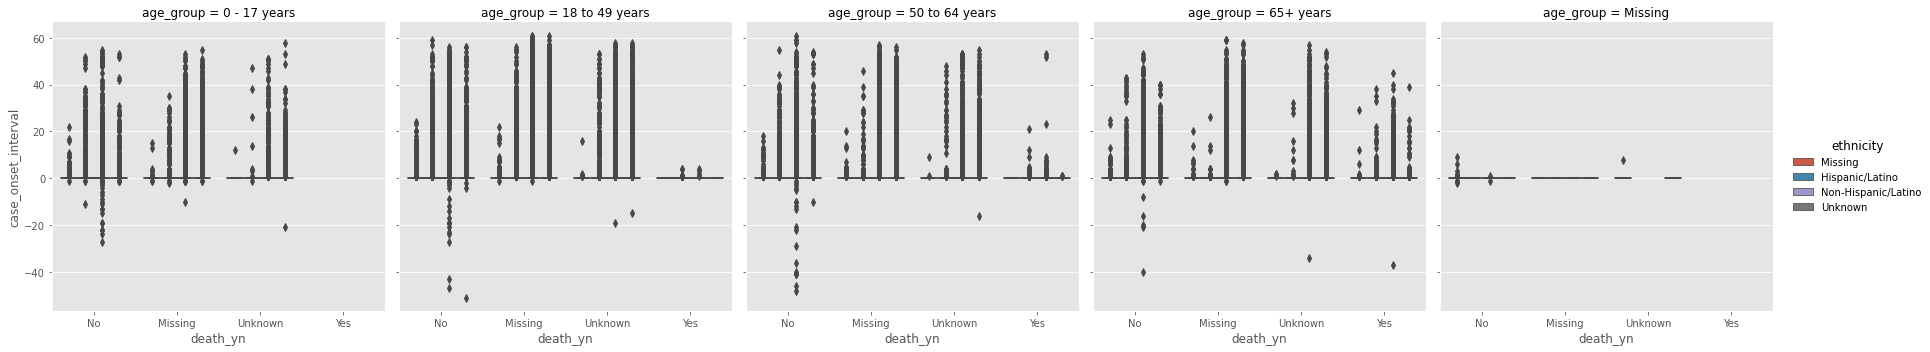

In [9]:
# Decided to dropped due to  high percentage missing values 
# sns.catplot(x="death_yn",
#                y = "case_onset_interval",
#                hue="ethnicity", 
#                col="age_group", 
#                data=df, 
#                kind="box");